# **Decision Tree**
[sklearn Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification)

[Decision Tree Explaination - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/)

[Decision Tree Explaination -kdnuggets](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

[Decision Tree CODE Explaination - towardsdatascience](https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d)

[Decision Tree CODE Explaination - datacamp](https://www.datacamp.com/tutorial/decision-tree-classification-python)


[heart-disease-dataset - download](https://docs.google.com/spreadsheets/d/10k7fLfwZoHZnfm9fM0ewJZ1LMCK3Otf5A7nysryn33o/edit?usp=sharing)

[heart-disease-dataset - Kaggle](https://www.kaggle.com/datasets/danetykpl/risk-factors-for-heart-disease)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")

Libraries imported 


In [32]:
df = pd.read_csv('practical 03\assets\heart-disease-dataset.csv')
print("dataframe of dataset created")

dataframe of dataset created


In [14]:
df.head()

,id,age,sex,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,1,47,Female,Non-Anginal Pain,128,245,0,No
1,2,62,Male,Typical Angina,130,267,1,Yes
2,3,58,Female,Atypical Angina,110,217,0,No
3,4,44,Male,Asymptomatic,140,235,0,Yes
4,5,50,Female,Non-Anginal Pain,140,263,0,No


In [33]:
df = df[['age','sex','chest_pain_type','resting_blood_presure', 'serum_cholesterol', 'fasting_blood_sugar', 'heart_disease_diagnosis']]

In [34]:
df.head()

,age,sex,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,47,Female,Non-Anginal Pain,128,245,0,No
1,62,Male,Typical Angina,130,267,1,Yes
2,58,Female,Atypical Angina,110,217,0,No
3,44,Male,Asymptomatic,140,235,0,Yes
4,50,Female,Non-Anginal Pain,140,263,0,No


# Cleaning DataSet

In [35]:
#finding NULL instances
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_presure      0
serum_cholesterol          0
fasting_blood_sugar        0
heart_disease_diagnosis    0
dtype: int64

In [ ]:
# @title
df.groupby('sex')['age'].mean()

In [9]:
# @title
# Substituting NULL with MEAN values
df['age']=df.groupby("sex")['age'].transform(lambda x: x.fillna(x.mean()))

In [36]:
df.rename(columns={"sex": "gender"}, inplace=True)

In [37]:
df.head()

,age,gender,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,47,Female,Non-Anginal Pain,128,245,0,No
1,62,Male,Typical Angina,130,267,1,Yes
2,58,Female,Atypical Angina,110,217,0,No
3,44,Male,Asymptomatic,140,235,0,Yes
4,50,Female,Non-Anginal Pain,140,263,0,No


# Changing category column to numerical column

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
df['gender'] = le.fit_transform(df.gender)

In [41]:
df.head()

,age,gender,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,47,0,Non-Anginal Pain,128,245,0,No
1,62,1,Typical Angina,130,267,1,Yes
2,58,0,Atypical Angina,110,217,0,No
3,44,1,Asymptomatic,140,235,0,Yes
4,50,0,Non-Anginal Pain,140,263,0,No


In [42]:
df['chest_pain_type'] = le.fit_transform(df.chest_pain_type)

In [43]:
df.head()

,age,gender,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,47,0,2,128,245,0,No
1,62,1,3,130,267,1,Yes
2,58,0,1,110,217,0,No
3,44,1,0,140,235,0,Yes
4,50,0,2,140,263,0,No


In [44]:
df['heart_disease_diagnosis'] = le.fit_transform(df.heart_disease_diagnosis)

In [45]:
df.head()

,age,gender,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
0,47,0,2,128,245,0,0
1,62,1,3,130,267,1,1
2,58,0,1,110,217,0,0
3,44,1,0,140,235,0,1
4,50,0,2,140,263,0,0


In [47]:
# X- Features  y- Label
X = df[['age','gender','chest_pain_type','resting_blood_presure', 'serum_cholesterol', 'fasting_blood_sugar']]
y= df['heart_disease_diagnosis']

# Doing train_test_split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model


In [49]:
#https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [50]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  79.01234567901234


# Checking accuracy of training dataset

In [51]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9947089947089947

#### Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is ```overfitted ``` and to ```avoid``` this we will use ```Pruning``` method later.

# Visualizing our final decision tree

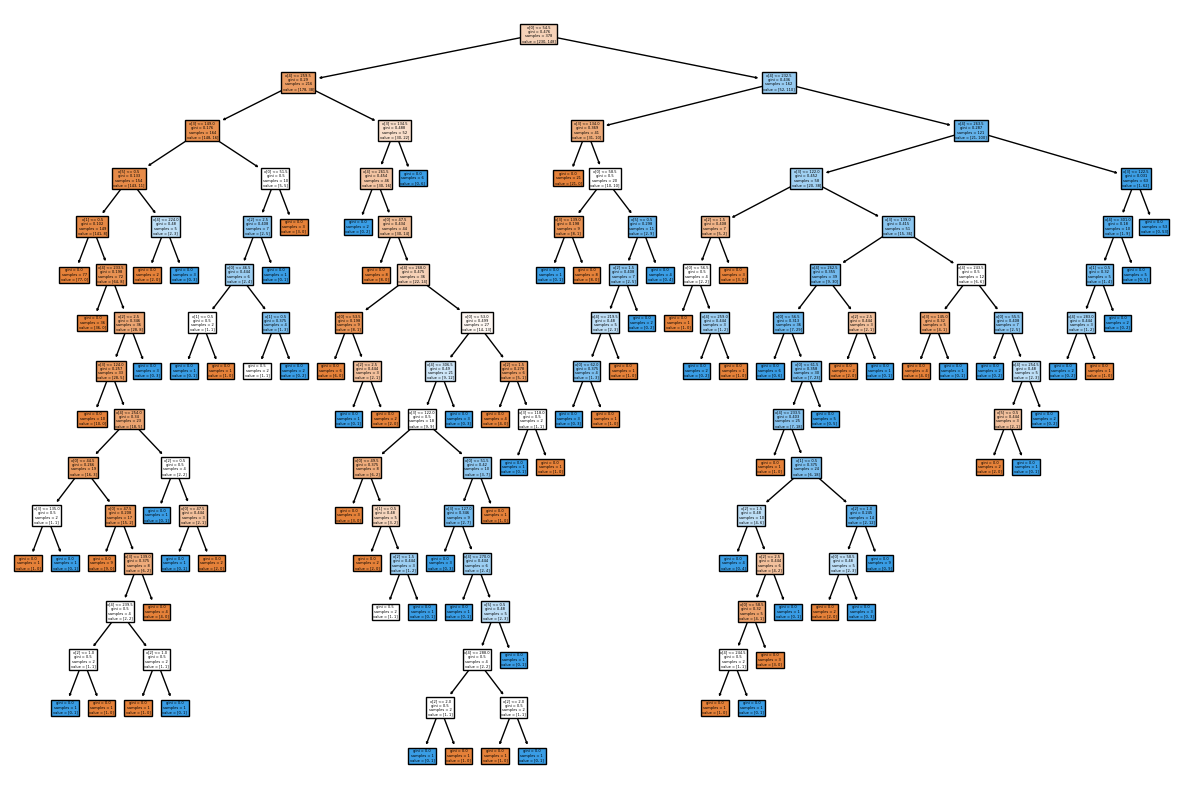

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.69      0.63      0.66        52

    accuracy                           0.79       162
   macro avg       0.76      0.75      0.75       162
weighted avg       0.79      0.79      0.79       162

[[95 15]
 [19 33]]


# Evaluating our training dataset

In [54]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       230
           1       1.00      0.99      0.99       148

    accuracy                           0.99       378
   macro avg       1.00      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378

[[230   0]
 [  2 146]]


# Finding false positive rate and true positive rate
[Understand ROC AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,False%20Positive%20Rate)

In [55]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
print("FPR :",fpr_dt)
print("TPR :",tpr_dt)
print("Threshold :",thresholds_dt)


FPR : [0.         0.13636364 0.14545455 1.        ]
TPR : [0.         0.63461538 0.63461538 1.        ]
Threshold : [2.  1.  0.5 0. ]


# Plotting *ROC* curve for our Decision Tree

In [56]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.7474650349650349

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

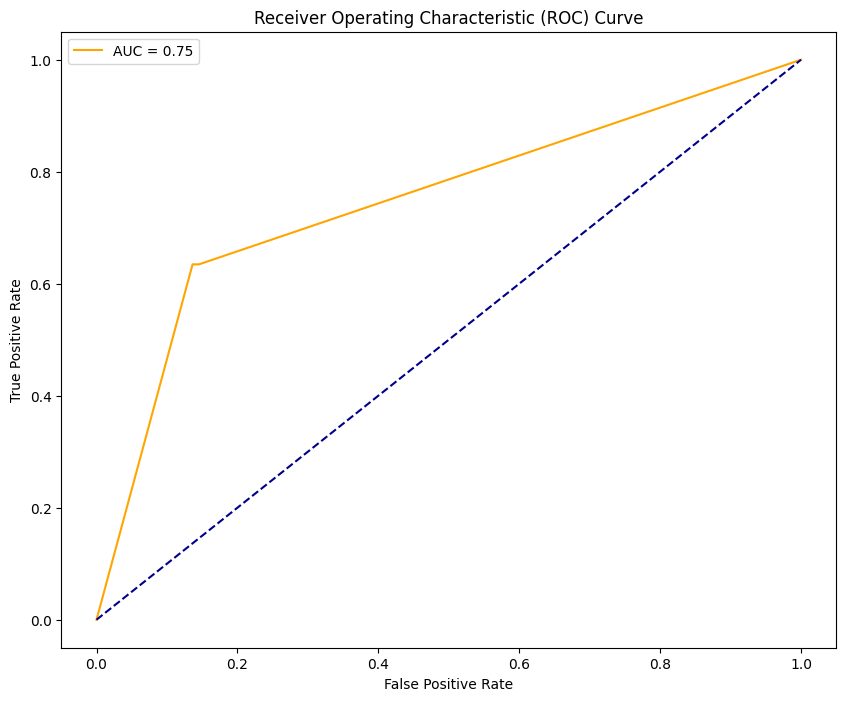

In [58]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [59]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

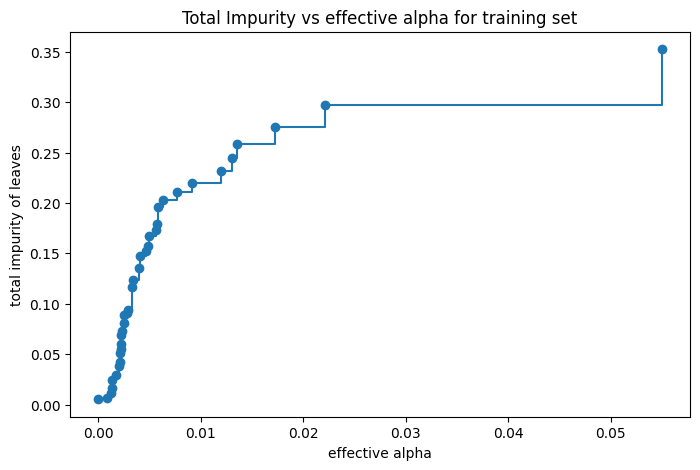

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.123965361178765


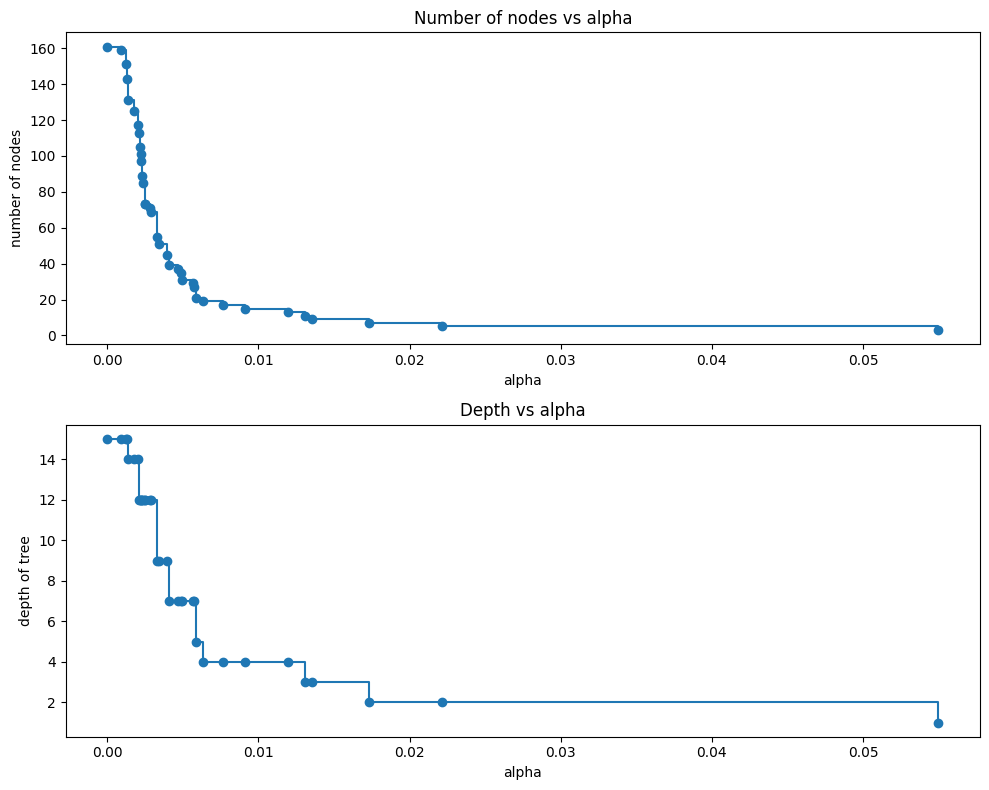

In [62]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

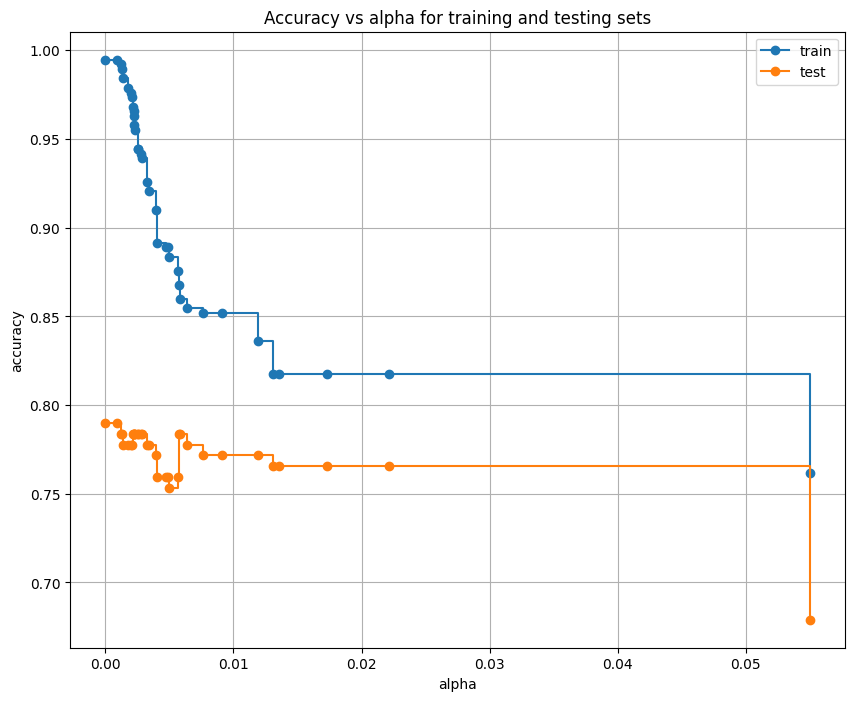

In [63]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [64]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

### Accuracy of test dataset

In [65]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7654320987654321

### Accuracy of training dataset

In [66]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.8174603174603174

# Visualizing after pruning

[Text(0.4444444444444444, 0.875, 'x[0] <= 54.5\ngini = 0.476\nsamples = 378\nvalue = [230, 148]'),
 Text(0.2222222222222222, 0.625, 'x[4] <= 259.5\ngini = 0.29\nsamples = 216\nvalue = [178, 38]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.176\nsamples = 164\nvalue = [148, 16]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.488\nsamples = 52\nvalue = [30, 22]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= 232.5\ngini = 0.436\nsamples = 162\nvalue = [52, 110]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.369\nsamples = 41\nvalue = [31, 10]'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 263.5\ngini = 0.287\nsamples = 121\nvalue = [21, 100]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.452\nsamples = 58\nvalue = [20, 38]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.031\nsamples = 63\nvalue = [1, 62]')]

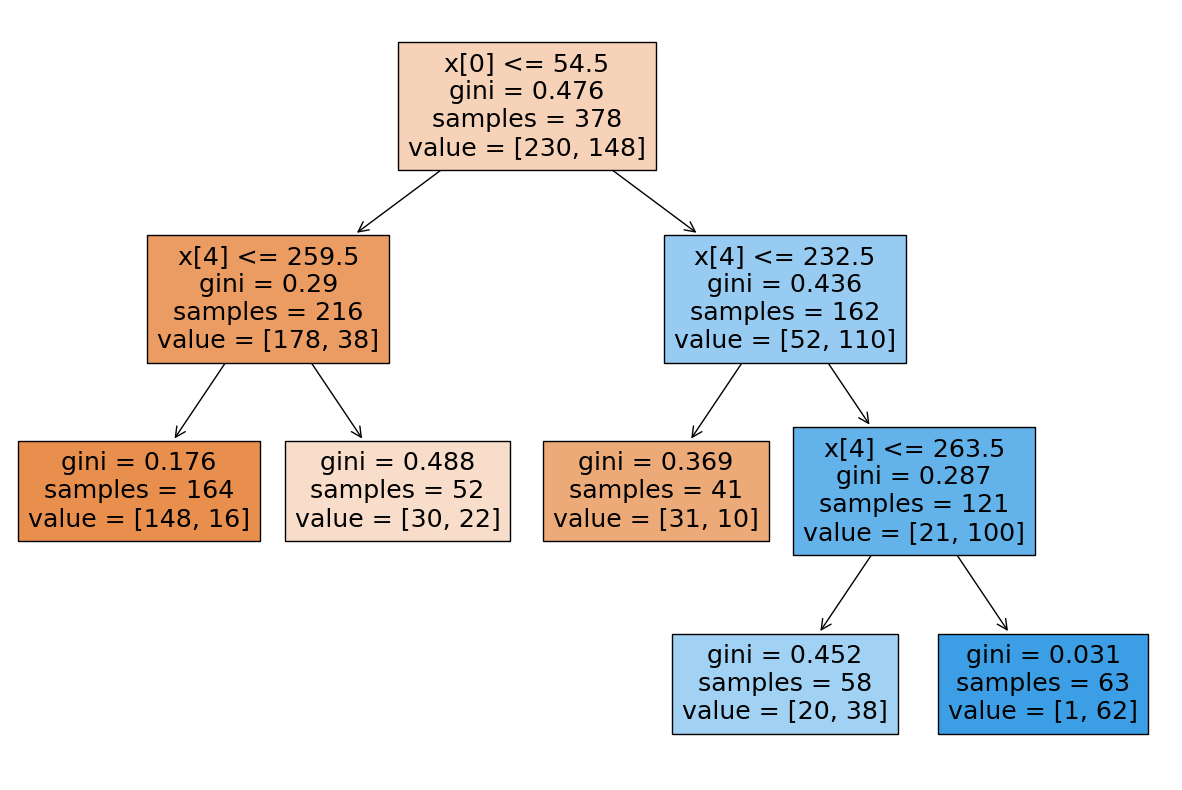

In [67]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)